# Result Analysis
This document is for analysing the results of my thesis project 


Include all libraries used

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Image Data
Image data is saved in CSV format, with each row representing a pixel.

Currently all image has the same dimensions

In [23]:
def load_image_from_csv(filepath:str):
    data = pd.read_csv(filepath).to_numpy()
    #print(np.shape(data))
    img = np.zeros((512,512,3), dtype=np.float)

    for y in range(0,511):
        for x in range(0, 511):
            pixel = data[(511-y)*512 + x][:]
            img[y,x] = pixel

    return img

Load some test images for now

In [24]:
img_test = load_image_from_csv("Test.csv")
img_old = load_image_from_csv("Old.csv")
img_ref = load_image_from_csv("Naive.csv")

## Error Metric

Defines function for calculating the error in each image relative to the reference.

- MSE
- RMSE
- SSIM

In [25]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

Calculate mse of the two example images

In [26]:
print("Lighttree MSE: {}".format(mse(img_test, img_ref)))
print("Energy    MSE: {}".format(mse(img_old, img_ref)))

Lighttree MSE: 0.03822921033389349
Energy    MSE: 0.36236533546526095


## Show Images
functions for showing the images and visualize the differences

In [27]:
figure_dpi = 200

def difference(ImgA, ImgB):
    diff = np.abs(ImgA - ImgB)
    return diff[:,:,0] + diff[:,:,1] + diff[:,:,2]

def show_img(img):
    plt.figure(dpi=figure_dpi)
    plt.imshow(img)
    plt.show()

def show_spectral(img):
    plt.figure(dpi=figure_dpi)
    plt.imshow(img, cmap="coolwarm")
    plt.clim(0, 1)
    plt.colorbar()
    plt.show()

def show_diff_image(imgA, imgB):
    diff = difference(imgA, imgB)
    diff = np.clip(diff,0.0,1.0)
    show_spectral(diff)

def exposure(img, exposure):
    # reinhard tone mapping
    return img / (img+exposure)

def gamma(img, gamma):
    return np.power(img, 1.0 / gamma)

def color_correct(img):
    return gamma(exposure(img, 1.0), 2.2)

Show the example images

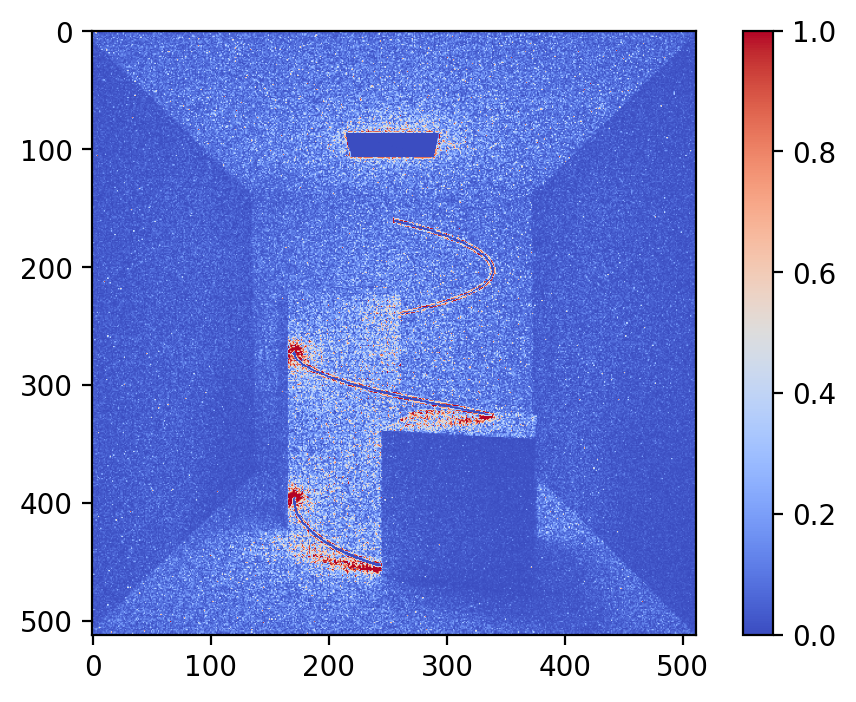

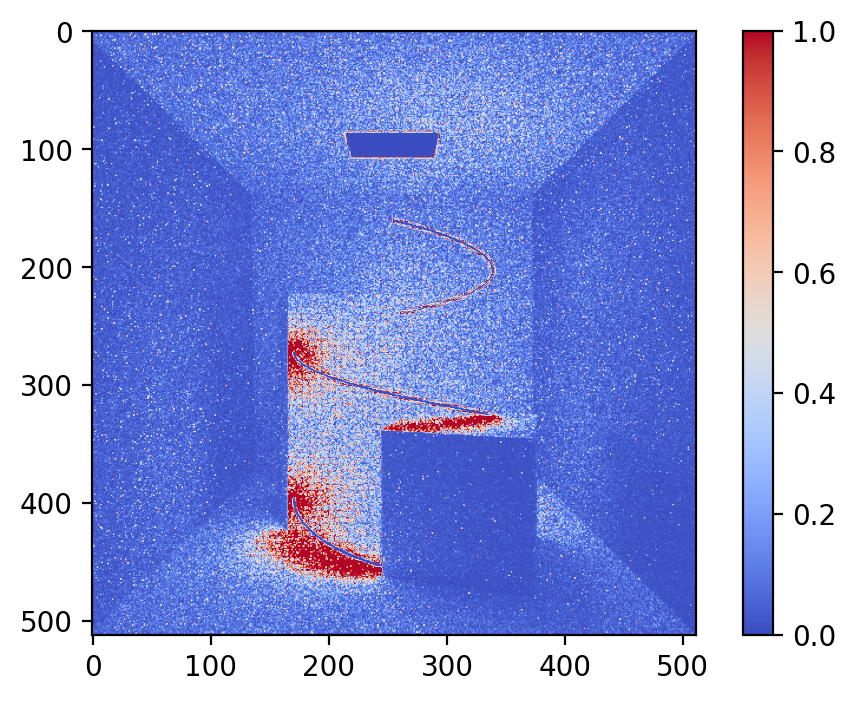

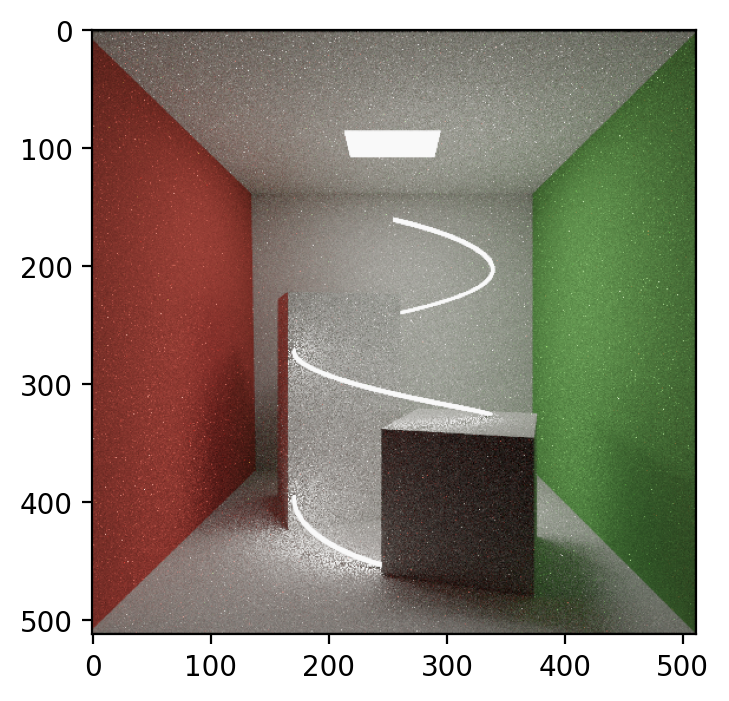

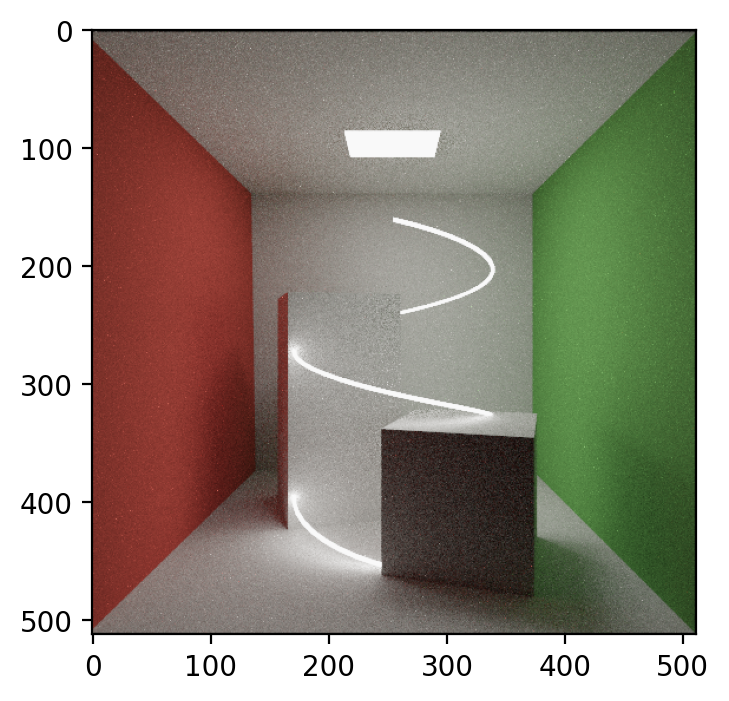

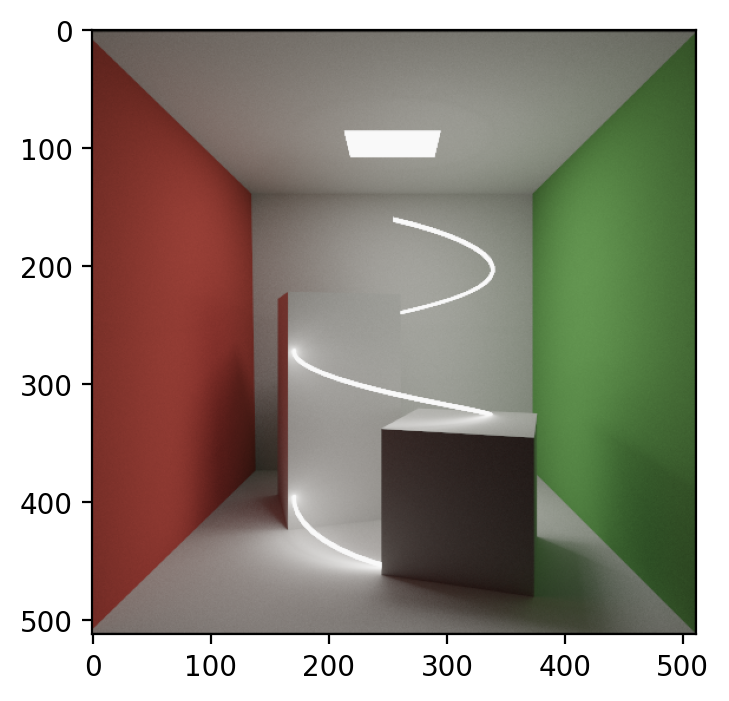

In [28]:
show_diff_image(img_test, img_ref)
show_diff_image(img_old, img_ref)


img_ref_corr = color_correct(img_ref)
img_test_corr = color_correct(img_test)
img_old_corr = color_correct(img_old)

show_img(img_old_corr)
show_img(img_test_corr)
show_img(img_ref_corr) 